In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
      ('order_items.csv','order_items')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Kiran@2003',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/kiran/OneDrive/Desktop/uni/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import mysql.connector


db= mysql.connector.connect(host="localhost",
                            username="root",
                            password="Kiran@2003",
                            database="ecommerce")

cur=db.cursor()

#this is the reused code 


In [2]:
def run_query(query):
    cur.execute(query)
    return cur.fetchall()

list all the unique customer cities 

In [3]:
querry="""select distinct customer_city from customers"""
run_query(querry)

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#count the no of orders placed in 2017

In [8]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp) =2017"""
count=run_query(query)
print("the no of orders placed in 2017 is",count[0][0])

the no of orders placed in 2017 is 45101


#find the total sales per product category

In [20]:
query="""select upper(products.product_category) category,round(sum(payments.payment_value) ,2)sales
 from products 
join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category"""
df=pd.DataFrame(run_query(query),columns=["category","Sales"])
df

,category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


 Calculate the percentage of orders that were paid in installments.

In [28]:
query ="""
select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 from payments
"""
data=run_query(query)
print(f"the percentage of orders that wew paid in installments is {data[0][0]} %")


the percentage of orders that wew paid in installments is 99.9981 %


Count the number of customers from each state. 

In [ ]:
query = """
SELECT customer_state,COUNT(customer_id)
FROM customers 
GROUP BY customer_state
"""
df=pd.DataFrame(run_query(query),columns=["state", "total"])
df

,state,total
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


Calculate the number of orders per month in 2018.

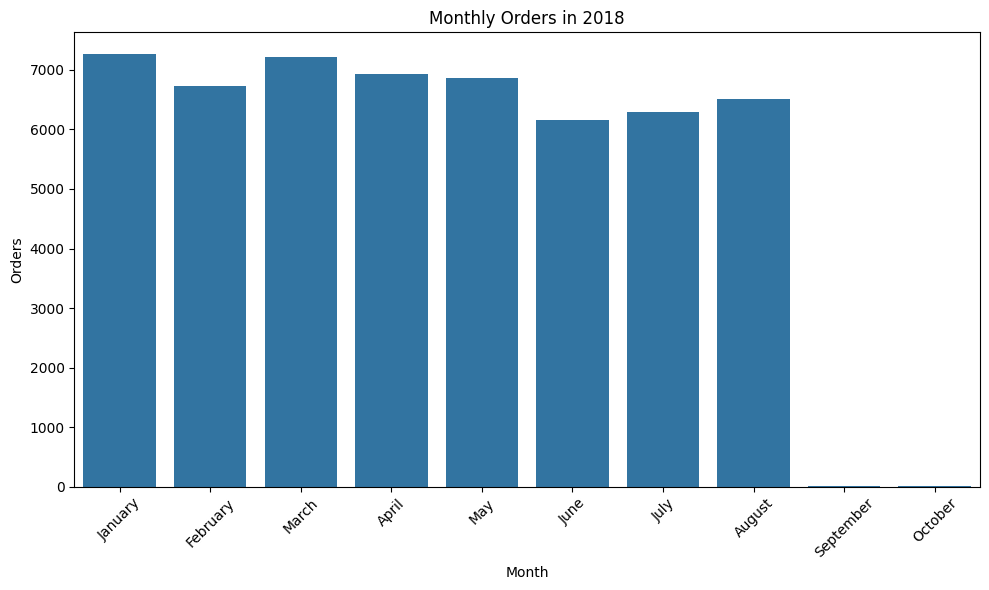

,Month,Orders
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


In [45]:
query = """
SELECT 
    MONTHNAME(order_purchase_timestamp) AS Month,
    COUNT(order_id) AS Orders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp)
"""

df = pd.DataFrame(run_query(query), columns=["Month", "Orders"])

# Month order with correct capitalization
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October"]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="Orders", data=df, order=[m for m in month_order if m in df["Month"].values])
plt.title("Monthly Orders in 2018")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df


 Find the average number of products per order, grouped by customer city.

In [47]:
query="""
select orders.order_id,orders.customer_id,count(order_items.order_id)
from orders join order_items
on orders.order_id=order_items.customer_id
group by orders.order_id,orders.customer_id
"""
run_query(query)

ProgrammingError: 1054 (42S22): Unknown column 'order_items.customer_id' in 'on clause'